# Simple Linear Regression

### 1.Linear regression

- Linear regression은 종속 변수 y와 한개 이상의 독립 변수 $X$와의 선형 관계를 모델링 
- 독립 변수 : input Data 
- 종속 변수 : 독립 변수에 의해 영향을 받는 변수 (Label)
- 선형 관계의 modeling은 1차로 이루어진 직선을 구하는 것 
- input와 Label 데이터의 관계를 가장 잘 설명하는 최적의 직선을 찾아냄으로써 독립 변수와 종속 변수 사이의 관계를 도출해 내는 과정 

### simplt linear regression
- 독립 변수가 1개이다 
- 변수가 하나인 직선 

### 1-1. 미분 

- 미분한 값이 0이 되는 지점 -> 최솟값이 되는 지점 


In [1]:
# Sympy : 기호 계산을 위한 오픈 소스 python 라이브러리 
!pip install sympy

In [2]:
import sympy
import numpy
from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()


In [3]:
x = sympy.Symbol("x", real=True)

f = x**2 + 1*x -6
f 

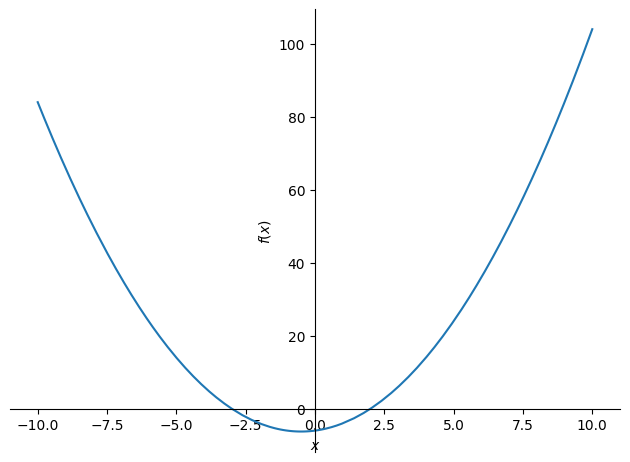

In [4]:
sympy.plotting.plot(f)

In [5]:
# 1차 미분 

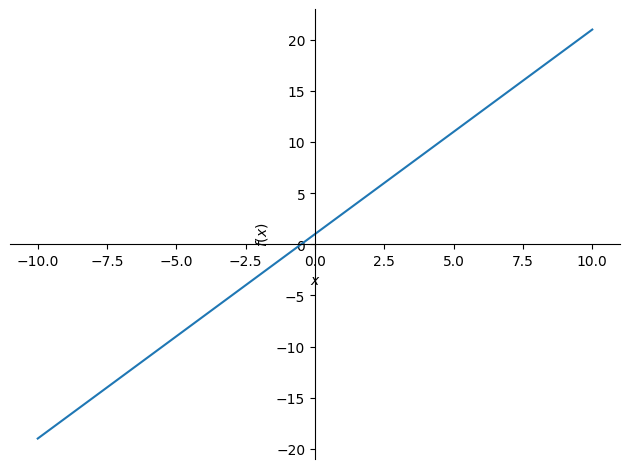

In [6]:
fprime= f.diff(x)
fprime
sympy.plotting.plot(fprime)

In [7]:
# 1차 미분식의 해 
sympy.solve(fprime, x)

In [8]:
fp_num = sympy.lambdify(x, fprime)

In [9]:
x = 5
for i in range(100):
    x = x - fp_num(x)*0.1

In [10]:
print(x)

-0.4999999988796302


### 1-2. Gradient Descent

### 1-3. Linear regression

In [11]:
import numpy as np 

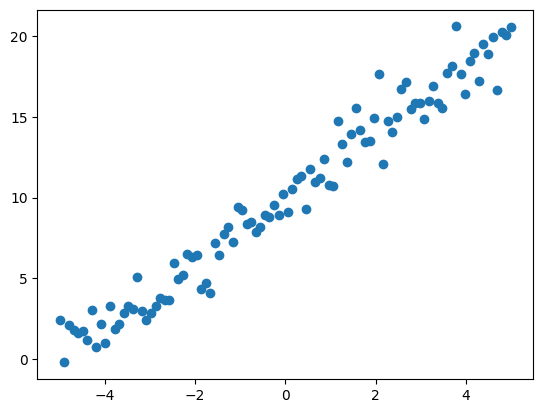

In [12]:
x_data = np.linspace(-5, 5, 100) # 정규분포에서 난수 생성후 10을 곱해줌 
weight_1 = 2
weight_0 = 10
y_data = weight_1 * x_data + weight_0 + np.random.normal(size=100)

# x에 2를 곱한다음 + 편향 10 + 난수를 더해준다 (noise)
# y = 2 * x +10 # 기울기가 2인 직선 편향이 10 

pyplot.scatter(x_data, y_data)

In [13]:
# costfunction

w_1, x, w_0,  y = sympy.symbols("w_1 x w_0 y")
# cost_function = (weight_1 * x_data + weight_0 - y_data) ** 2 
cost_function = (w_1 * x + w_0 -y) ** 2

In [14]:
cost_function

In [15]:
# 기울기 함수 정의 
grad_w_0 = sympy.lambdify([w_1, x , w_0, y], cost_function.diff(w_0), "numpy")
grad_w_1 = sympy.lambdify([w_1, x , w_0, y], cost_function.diff(w_1), "numpy")

In [16]:
grad_w_0

<function _lambdifygenerated(w_1, x, w_0, y)>

In [17]:
# w_0, w_1의 초기값 지정
w_0 = 10.0
w_1 = 10.0

for i in range(100000):
    descent_w_0 = numpy.sum(grad_w_0(w_1, w_0, x_data, y_data))/len(x_data)
    descent_w_1 = numpy.sum(grad_w_1(w_1, w_0, x_data, y_data))/len(x_data)
    w_0 = w_0-descent_w_0*0.01
    w_1 = w_1-descent_w_1*0.01

In [18]:
print(w_0)
print(w_1)

9.424106916809237
1.0662244345196115


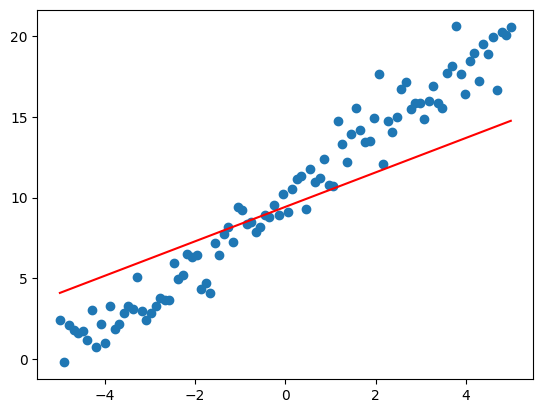

In [19]:
pyplot.scatter(x_data, y_data)
pyplot.plot(x_data, w_1*x_data + w_0, '-r');

#### 위에 수학적 지식은 획득하지 못했으나 계속 반복하면 언젠간 이해할것으로 믿는다..

In [20]:
# linear regression 을 이용해 지구 온도변화를 예측해 보세요 
# https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD
# 1. 연도에 따른 데이터 상승을 그래프로 확인하세요
# 2. sklearn을 이용해 linear 그래프를 예측해 보세요 
# 다시 복습하는 시간 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [22]:
url = "https://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [23]:
data

,Global Land Temperature Anomalies,January-December
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999.0000,NaN
3,Year,Value
4,1880,-0.47
...,...,...
136,2012,0.92
137,2013,1.01
138,2014,1.02
139,2015,1.35


In [24]:
data = pd.read_csv(url, header=4) # 헤더를 해주는 이유 위에 2행까지 쓸모없는 정보기 때문에 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    137 non-null    int64  
 1   Value   137 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [26]:
data.isnull().sum() # 데이터 전처리 과정 

Year     0
Value    0
dtype: int64

In [27]:
x_data = data.Year #데이터 셋 분리 
y_data = data.Value

In [34]:
from sklearn.model_selection import train_test_split
x_train ,x_valid ,y_train ,y_valid = train_test_split(x_data, y_data, test_size=0.2)

In [35]:
x_train = x_train.values.reshape((-1,1))

In [36]:
y_train.shape

In [37]:
x_train.shape

In [38]:
model = LinearRegression(fit_intercept=True) # fit_intercept : 상수항 유무 판단
model.fit(x_train, y_train) # y절편  #모델생성 및 학습 

LinearRegression()

In [40]:
x_valid = x_valid.values.reshape((-1,1))

In [41]:
y_valid_predict = model.predict(x_valid) # 예측 수행 

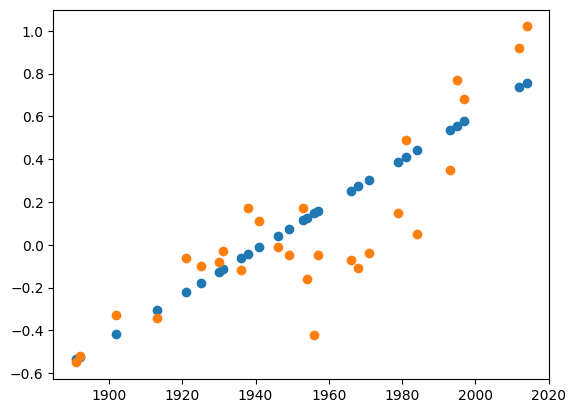

In [49]:
plt.scatter(x_valid, y_valid_predict)
plt.scatter(x_valid, y_valid) # 컴퓨터의 예측은 일정한상승이지만 달랐다. 

## Metric

- 모델 성능 평가지표
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정
- 모델 평가 목적
    - 최적의 모델 찾기 위해 

- 회귀 문제 성능측정
    - 실제값과 예측값의 차이를 측정

# 회귀 문제 성능측정

### 당뇨병 진행 예측
- 당뇨병 진행도를 예측하는 데이터셋 

In [50]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data, diabetes.target

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [51]:
data = diabetes.data
target = diabetes.target

In [52]:
data.shape # reshape 필요가 없음 2차원 배열이라 

In [53]:
print(target.min())
print(target.max())

25.0
346.0


## 학습셋과 검증셋 분리 

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

## Linear Regression 모델을 이용한 학습 및 예측 
$$
y = w_1 x_1 + ... + w_{10} x_{10} + w_0
$$

- w : 가중치
- b : 편향

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
model.fit(x_train, y_train)

LinearRegression()

In [60]:
y_valid_predict = model.predict(x_valid)

In [61]:
y_valid_predict

array([112.80501885, 200.19075045,  86.43498155, 194.92932228,
        68.52253587, 123.95250189, 170.32598539, 199.97021761,
       209.65239681, 156.34854065, 255.42335762, 109.93947158,
       101.42172866, 195.23886884, 153.79856824, 166.66762247,
        48.80790925,  77.8496043 ,  95.39446551,  62.41465743,
       109.32534662,  97.25875903, 154.88650551, 123.44444341,
       121.1406168 ,  71.49303938,  68.98065985,  77.81802938,
       234.35891205, 265.29628465, 173.77812316, 287.20048578,
        88.24532127,  51.13501207, 141.55834503, 171.5045101 ,
       182.95991971, 150.88390009, 217.72182466, 109.42204603,
       168.6871903 , 235.71538856,  57.58079777, 101.04001133,
        80.7250111 , 142.92066417, 159.38397172, 263.84453059,
       142.48683554, 159.18836722, 218.61744561, 134.22822306,
       158.04649204, 116.28468571,  95.39515034, 231.24079941,
        53.7132793 , 160.05282265, 109.19561322, 117.42666171,
       165.13211402, 294.03204812,  99.77111451, 185.66

## 회귀 평가 지표 

### MSE(Mean Squared Error)
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$
- 실제값과 예측값의 차이를 제곱해서 평균화
- 이상치에 민감
- 직관적이지 못하다.
- 손실함수로 주로 사용한다.


In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid_predict, y_valid)
print(mse)

2636.1013936802897


### RMSE(Root Mean Squared Error)
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$
- MSE에 루트
- 이상치 민감


In [63]:
# 방법1
import numpy as np 
print(np.sqrt(mse))

# 방법2

rmse = mean_squared_error(y_valid_predict, y_valid, squared=False) # MSE에 스쿼드 False면 RMSE
print(rmse) 

51.342978036731466
51.342978036731466


### MAE(Mean Absolute Error)
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$
- 실제값과 예측값의 차이를 절대값으로 변환해서 평균화
- 직관적이다.

In [64]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid_predict, y_valid)
mae

### MAPE (Mean Absolute Percentage Error)
$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}}
$$
- 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현

In [65]:
# 방법 1
def mape(true,pred):
    return np.mean(np.abs((true - pred)/ true))
print(mape(y_valid_predict, y_valid))

# 방법 2 
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid_predict, y_valid)

0.3063377196266265


### SMAPE (Symmetric Mean Absolute Percentage Error)
$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y_i}|}{{|y_i|}+|\hat{y_i}|}}
$$
- 기존 mape의 단점을 보완한것
- MAPE와 다른점은 각 실제값과 예측값을 절대값으로 변경후 핪으로 나눈다.
- MAPE와 다르게 실제값에 0이 존재해도 계산이 가능하다.
- 실제값보다 예측값이 크거나 작을수도있다.
- 예측값이 실제값보다 작을때, 분모가 작아지기 때문에 오차가 커지게 된다. (과소추정에 대한 패널티가 줄수가 있다.)

In [68]:
def smape(true,pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)
smape(y_valid_predict, y_valid)

### 결정계수 R2 
- 결정계수는 실제 관측값의 분산대비 예측값의 분산을 계산하여 데이터 예측의 정확도 성능을 측정하는 지표 
- 0~1까지 수로 나타내어지며 1에 가까울수록 100%의 설명력을 가진 모델이라고 평가를 하게된다.
- R^2 =1 : 현재 가지고 있는 X변수로 Y를 100% 설명. 즉, 모든 관측치가 회귀직선에 있다.
- R^2 = 0 : 현재 가지고 있는 X변수는 Y 설명(예측)에 전혀 도움이 되지 않는다
- 사용하고 있는 X변수의 품질


$$
R^2 = \frac{SSR}{SST} =\frac{오차^2}{편차^2} =  1- \frac{SSE}{SST}
$$

- SST (Sum of Squared Total): 관측치 - 예측값
- SSE (Sum of Squared Error): 관측값 - 예측값, 즉 잔차제곱합 RSS와 같은 의미이다.
- SSR (Sum of Squares due to Regression): 예측값 - 평균값

In [69]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_valid_predict)

#### 위 r2 MSE RMSE 정도 알아두고 쓰면 좋을듯 

# 선형 모델 (Linear Models)

- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  - $x_1$~$x_p$: 입력 데이터
  - $w$: 모델이 학습할 파라미터
    - $w_0$: 편향
    - $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

-  **선형 회귀(Linear Regression)** 또는 **최소제곱법(Ordinary Least Squares)** 은 가장 간단한 회귀 분석을 위한 선형 모델
- 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)** 를 최소화 하는 학습 파라미터 $w$를 찾음
- 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  - $y$: 정답
  - $\hat{y}$: 예측 값을 의미

- 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  - MAE(Mean Absoulte Error)
  - MAPE(Mean Absolute Percentage Error)
  - MSE(Mean Squared Error)
  - MPE(Mean Percentage Error)


#### 실습

In [70]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/tmp/ipykernel_639/3613632731.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
boston_df = pandas.read_csv("boston.csv")

--2022-12-21 02:00:18--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.009s  

2022-12-21 02:00:18 (4.25 MB/s) - ‘boston.csv’ saved [41084/41084]



In [73]:
del boston_df["Unnamed: 0"]

In [74]:
boston_df  
# MEDV 이 학습시켜야 하는 Target Data 입니다. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [77]:
# 통계량 확인 
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [78]:
data = boston_df.iloc[:,:-1]
target = boston_df.iloc[:,-1:]

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size= 0.2)

### 보스턴 주택 가격에 대한 선형 회귀

In [84]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

- 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [86]:
# 방법 1 
print(model.score(x_valid, y_valid))

# 방법 2 
from sklearn.metrics import r2_score
print(r2_score(y_valid, model.predict(x_valid)))

0.6654142936337887
0.6654142936337887


In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=4 , scoring="r2")
# 모델 , 훈련데이터 , 4개의 교차검증 , r2방식 

In [93]:
scores # r2 score의 값 
print(f"R2 score mean: {scores.mean()}, std:{scores.std()}") # 표준편차 계산 std

R2 score mean: 0.6960472269503046, std:0.11152726501310313


In [102]:
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv= 4 , scoring="neg_root_mean_squared_error")

In [100]:
scores # MSE의 값 
print(f"neg_root_mean_squared_error score mean:{scores.mean()}, std:{scores.std()}")

neg_root_mean_squared_error score mean:-4.917021048026662, std:0.6192336778197275


#### 생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체게 포함된 두 개의 속성 값을 통해 수식을 표현
- intercept_ : 추정된 상수향
- coef_:추정된 가중치 벡터 

In [104]:
model.fit(x_train, y_train)

LinearRegression()

In [105]:
model.coef_ #상수향 13개 

array([[-1.03200051e-01,  3.46333183e-02, -2.55441332e-02,
         2.44172071e+00, -1.74663182e+01,  4.44459583e+00,
        -3.81890465e-03, -1.38662985e+00,  3.05361660e-01,
        -1.17588559e-02, -1.03220437e+00,  1.01025480e-02,
        -4.43722955e-01]])

In [106]:
model.intercept_ # 가중치 w_0과 합침 

array([33.01551276])

In [107]:
print('w_0 = ' + str(model.intercept_) + " ")
for i, c in enumerate(model.coef_[0]):  
    print('w_' + str(i+1) + "=" + str(c))

w_0 = [33.01551276] 
w_1=-0.10320005088017233
w_2=0.034633318341002625
w_3=-0.025544133188588853
w_4=2.4417207111632484
w_5=-17.466318181534547
w_6=4.444595830087253
w_7=-0.0038189046473146573
w_8=-1.386629851079325
w_9=0.3053616597545087
w_10=-0.01175885589372555
w_11=-1.032204366058849
w_12=0.01010254796153026
w_13=-0.44372295469749895


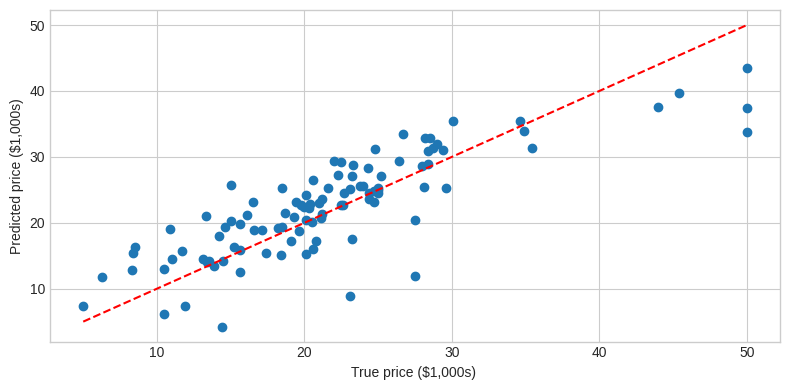

In [108]:
def plot_boston_price(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected,predicted)
    plt.plot([5,50], [5,50], '--r') #기준점
    plt.xlabel('True price ($1,000s) ')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()
    
predicted = model.predict(x_valid)
expected = y_valid

plot_boston_price(expected, predicted)

# 캘리포니아 주택 가격 데이터 

In [110]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [111]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [113]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [112]:
print(california.DESCR) # DESCR 임포트 데이터셋에만 적용 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [114]:
import pandas as pd 

california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df["target"] = california.target

In [116]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [118]:
model = LinearRegression()
x_train, x_valid, y_train, y_valid = train_test_split(california_df, california.target, test_size=0.2)

In [119]:
model.fit(x_train, y_train)

LinearRegression()

In [121]:
y_valid_predict = model.predict(x_valid)

In [123]:
from sklearn.metrics import r2_score, mean_squared_error

In [124]:
print("R2 Score", r2_score(y_valid, y_valid_predict))
print("MSE", mean_squared_error(y_valid, y_valid_predict))

R2 Score 1.0
MSE 1.3488822741631318e-26


In [125]:
y_train_predict = model.predict(x_train)
print("R2 score", r2_score(y_train, y_train_predict))
print("MSE", mean_squared_error(y_train, y_train_predict))

R2 score 1.0
MSE 1.3480914679660252e-26


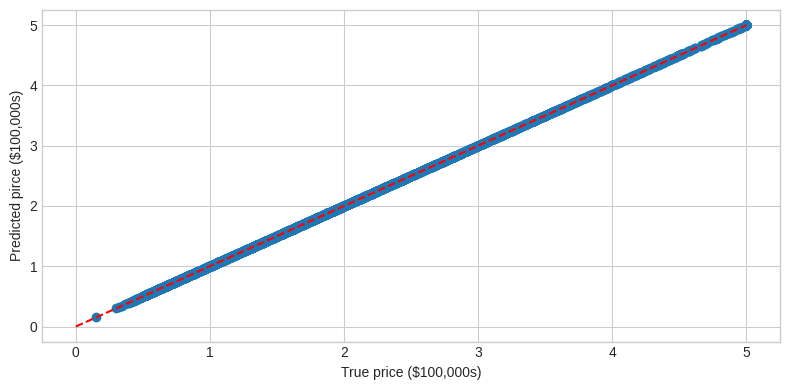

In [127]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

predicted = model.predict(x_valid)
expected = y_valid

plot_california_prices(expected, predicted)